In [28]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from keras.preprocessing.sequence import TimeseriesGenerator
from pylab import rcParams
from matplotlib import rc
import seaborn as sns
import tensorflow as tf

%matplotlib inline
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [29]:
df = pd.read_csv('sales dataset.csv')
df

,SalesId,salesInvoiceNo,salesInvoice_fk_categoryId,salesDate,salesAmount,cashPayment,posPayment,transferPayment,chequePayment,salesPeriod,paymentStatus,depositedAmount,balanceAmount,salesOption,sales_fk_storeId,addedBy_fk_userId,softDelete,softDeleteReason,softDeleteDate,softDeletedBy_fk_userId
0,132,4363,3,10/27/2020,1200,1200,0,0,0,Morning,Full Payment,0,0,1,1,1014,0,NaN,0000-00-00,0
1,133,4364,3,10/27/2020,100,100,0,0,0,Morning,Full Payment,0,0,0,1,1014,0,NaN,0000-00-00,0
2,134,4365,3,10/27/2020,6900,5000,0,1900,0,Morning,Full Payment,0,0,1,1,1014,0,NaN,0000-00-00,0
3,135,4366,3,10/27/2020,1800,1800,0,0,0,Morning,Full Payment,0,0,1,1,1014,0,NaN,0000-00-00,0
4,136,134858,3,10/27/2020,400,400,0,0,0,Morning,Full Payment,0,0,0,1,1014,0,NaN,0000-00-00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89240,90972,515583,3,11/10/2023,18450,18450,0,0,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0
89241,90973,515584,3,11/10/2023,4000,4000,0,0,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0
89242,90974,515585,3,11/10/2023,2000,2000,0,0,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0
89243,90975,515586,3,11/10/2023,2600,0,0,2600,0,Morning,Full Payment,0,0,1,1,1025,0,NaN,0000-00-00,0


In [30]:
df['salesDate'] = pd.to_datetime(df['salesDate'], infer_datetime_format=True)
df['salesDate']

0       2020-10-27
1       2020-10-27
2       2020-10-27
3       2020-10-27
4       2020-10-27
           ...    
89240   2023-11-10
89241   2023-11-10
89242   2023-11-10
89243   2023-11-10
89244   2023-11-10
Name: salesDate, Length: 89245, dtype: datetime64[ns]

In [31]:
selected_columns = ['salesDate', 'salesAmount']
df = df[selected_columns]
# Added newly to avoid that copy message error
df = df.copy() 
df

,salesDate,salesAmount
0,2020-10-27,1200
1,2020-10-27,100
2,2020-10-27,6900
3,2020-10-27,1800
4,2020-10-27,400
...,...,...
89240,2023-11-10,18450
89241,2023-11-10,4000
89242,2023-11-10,2000
89243,2023-11-10,2600


In [32]:
# # pd.to_datetime(df['salesDate'], dayfirst=True, format='%m-%d-%Y').dt.strftime('%d-%m-%Y')/// previous mistake
# df['salesDate'] = pd.to_datetime(df['salesDate'], dayfirst=True)
df.index = df['salesDate']
df

,salesDate,salesAmount
salesDate,,
2020-10-27,2020-10-27,1200
2020-10-27,2020-10-27,100
2020-10-27,2020-10-27,6900
2020-10-27,2020-10-27,1800
2020-10-27,2020-10-27,400
...,...,...
2023-11-10,2023-11-10,18450
2023-11-10,2023-11-10,4000
2023-11-10,2023-11-10,2000


(array([18628., 18748., 18871., 18993., 19113., 19236., 19358., 19478.,
        19601., 19723.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01')])

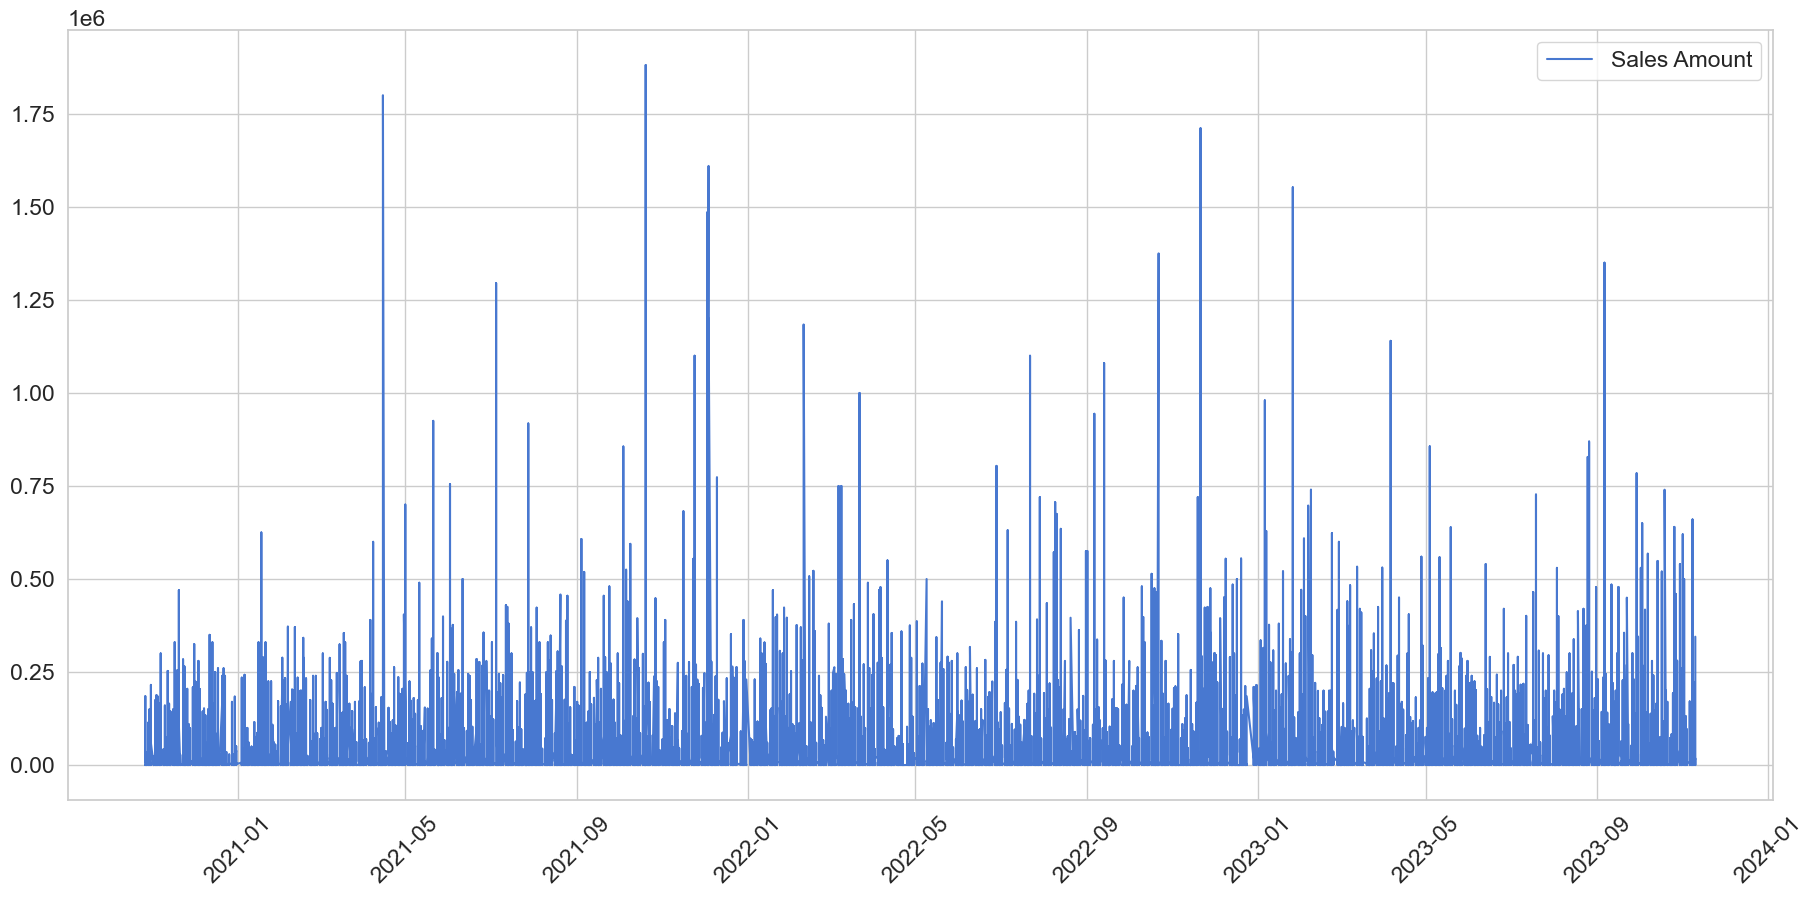

In [33]:
plt.plot(df["salesAmount"], label='Sales Amount')
plt.legend();
plt.xticks(rotation=45)

In [34]:
# Display the data type and sample values of the 'salesDate' column
print(df['salesDate'].head())
print(df['salesDate'].dtype)

salesDate
2020-10-27   2020-10-27
2020-10-27   2020-10-27
2020-10-27   2020-10-27
2020-10-27   2020-10-27
2020-10-27   2020-10-27
Name: salesDate, dtype: datetime64[ns]
datetime64[ns]


In [35]:
df['Year'] = df['salesDate'].dt.year
df['Month'] = df['salesDate'].dt.month
df['Day'] = df['salesDate'].dt.day
###################
df_daily = df.groupby(['Year','Month','Day'])['salesAmount'].sum().reset_index()
###################
df_daily

,Year,Month,Day,salesAmount
0,2020,10,27,504170
1,2020,10,28,439435
2,2020,10,29,491330
3,2020,10,30,560504
4,2020,10,31,1197790
...,...,...,...,...
936,2023,11,6,1396202
937,2023,11,7,1441488
938,2023,11,8,1867192
939,2023,11,9,1401098


<Axes: >

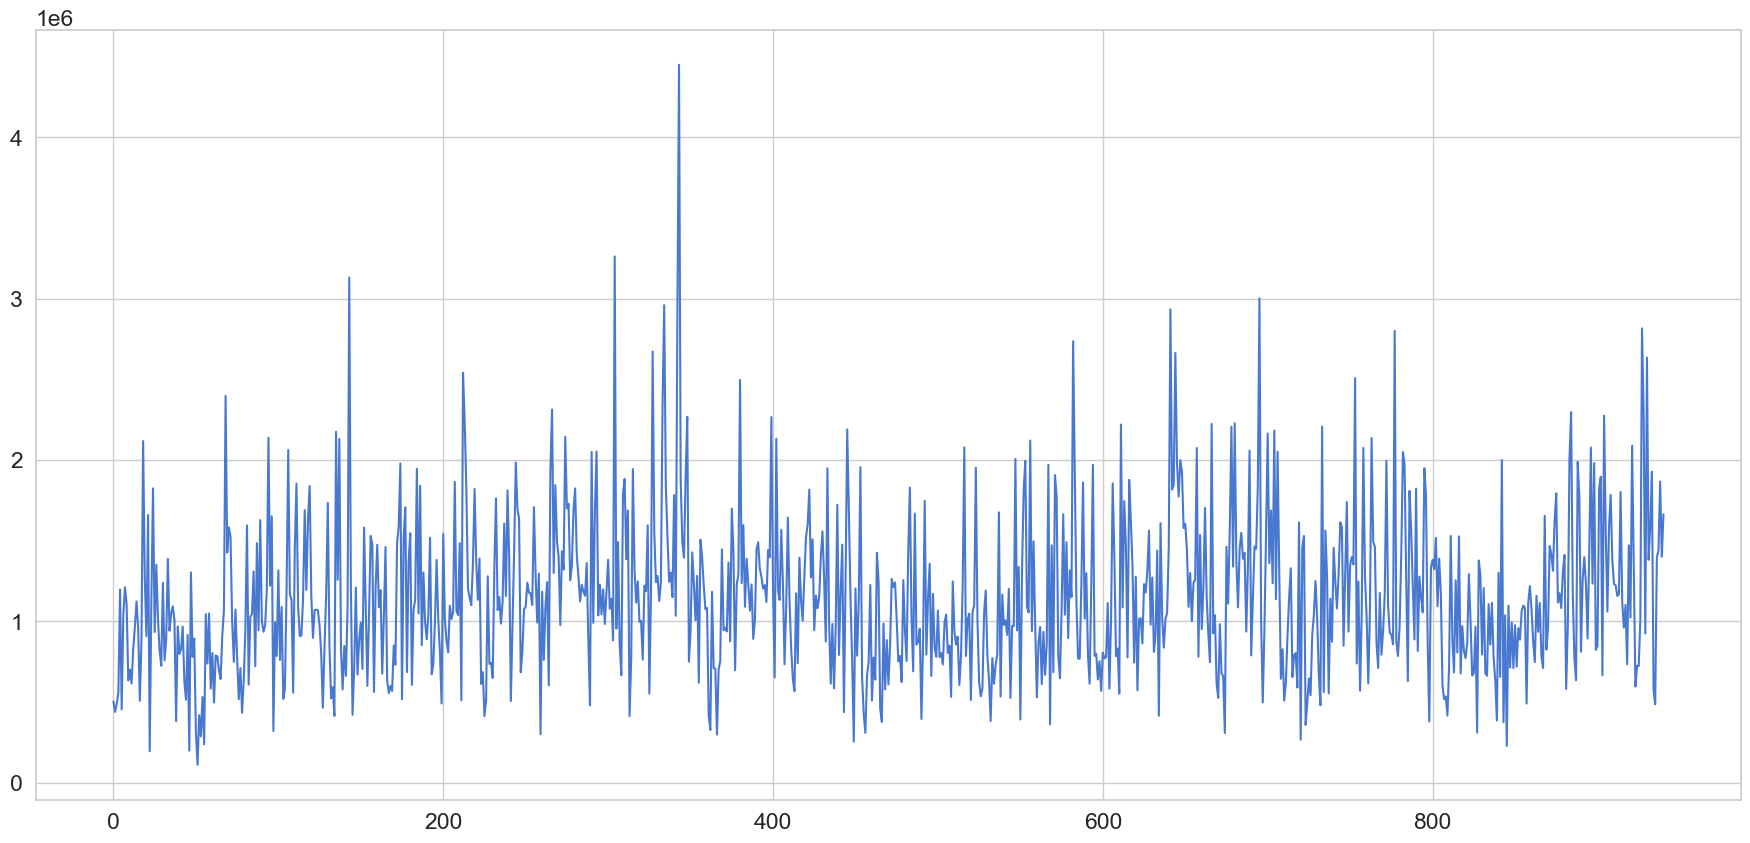

In [36]:
revenue = df_daily['salesAmount']
revenue.plot()

In [37]:
len(df_daily)

941

In [38]:
revenue = np.array(revenue).reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(revenue)

In [39]:
# def df_to_X_y(df, window_size=3):
#     df_as_np = df
#     X = []
#     y = []
#     for i in range(len(df_as_np) - window_size):
#         row = [[a] for a in df_as_np[i:i+window_size]]
#         X.append(row)
#         label = df_as_np[i+window_size]
#         y.append(label)
#     return np.array(X), np.array(y)

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(scaled_data, scaled_data, test_size=0.2, random_state=42, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True)

In [41]:
y_test

array([[0.19759743],
       [0.1372335 ],
       [0.30239197],
       [0.27550767],
       [0.30432166],
       [0.25166981],
       [0.50373515],
       [0.31126297],
       [0.40710054],
       [0.3119669 ],
       [0.33168308],
       [0.18556913],
       [0.3549288 ],
       [0.15434971],
       [0.240708  ],
       [0.15691072],
       [0.32450367],
       [0.15397216],
       [0.14052402],
       [0.23098902],
       [0.09785208],
       [0.41160991],
       [0.09296377],
       [0.2366308 ],
       [0.22658982],
       [0.11617423],
       [0.48609687],
       [0.24712471],
       [0.49145584],
       [0.0631695 ],
       [0.26356304],
       [0.21393135],
       [0.02695321],
       [0.15870512],
       [0.2818444 ],
       [0.15170526],
       [0.3346327 ],
       [0.1845863 ],
       [0.20360939],
       [0.12785887],
       [0.26438175],
       [0.06253771],
       [0.26005332],
       [0.14086838],
       [0.38653706],
       [0.13587543],
       [0.21999217],
       [0.246

In [42]:
length=4
generator = TimeseriesGenerator(X_train, X_train, length=length, batch_size=1)
generator

In [43]:
len(X_train)

752

In [44]:
len(X_test)

151

In [45]:
len(y_train)

752

In [46]:
len(y_test)

151

In [47]:
len(y_val)

38

In [48]:
len(X_val)

38

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((length,1)))
model.add(LSTM(64,))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
cp = ModelCheckpoint('Models/Sales Daily Prediction Model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [53]:
model.fit(generator, validation_data=(X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
747/748 [============================>.] - ETA: 0s - loss: 0.0214 - root_mean_squared_error: 0.1462INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 20s 20ms/step - loss: 0.0214 - root_mean_squared_error: 0.1461 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2016
Epoch 2/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0409 - val_root_mean_squared_error: 0.2022
Epoch 3/100
746/748 [============================>.] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1147INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 17ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1949
Epoch 4/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1144 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2013
Epoch 5/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1144 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1959
Epoch 6/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1973
Epoch 7/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1953
Epoch 8/100
745/748 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130INFO:tensorflow:Assets written to:

INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 17ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0373 - val_root_mean_squared_error: 0.1931
Epoch 9/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1132 - val_loss: 0.0376 - val_root_mean_squared_error: 0.1940
Epoch 10/100
740/748 [============================>.] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1134INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 12s 17ms/step - loss: 0.0128 - root_mean_squared_error: 0.1132 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1930
Epoch 11/100
748/748 [==============================] - 6s 9ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0376 - val_root_mean_squared_error: 0.1940
Epoch 12/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1935
Epoch 13/100
745/748 [============================>.] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1122INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 12s 16ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1887
Epoch 14/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1911
Epoch 15/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1129 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1899
Epoch 16/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1909
Epoch 17/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1891
Epoch 18/100
746/748 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1129INFO:tensorflow:Assets writte

INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 14s 19ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1885
Epoch 19/100
748/748 [==============================] - 8s 10ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1890
Epoch 20/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1903
Epoch 21/100
742/748 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 14s 18ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1881
Epoch 22/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1898
Epoch 23/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1910
Epoch 24/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1904
Epoch 25/100
747/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1129INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 12s 16ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877
Epoch 26/100
744/748 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1131INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 16s 21ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0351 - val_root_mean_squared_error: 0.1873
Epoch 27/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1894
Epoch 28/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1892
Epoch 29/100
748/748 [==============================] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 17s 23ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0350 - val_root_mean_squared_error: 0.1870
Epoch 30/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0351 - val_root_mean_squared_error: 0.1875
Epoch 31/100
744/748 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 18ms/step - loss: 0.0128 - root_mean_squared_error: 0.1129 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1855
Epoch 32/100
748/748 [==============================] - 8s 10ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1863
Epoch 33/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0350 - val_root_mean_squared_error: 0.1870
Epoch 34/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1897
Epoch 35/100
744/748 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1131INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 12s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1848
Epoch 36/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1882
Epoch 37/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1864
Epoch 38/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1884
Epoch 39/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1881
Epoch 40/100
743/748 [============================>.] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130INFO:tensorflow:Assets writte

INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 12s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 41/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 42/100
746/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 18ms/step - loss: 0.0128 - root_mean_squared_error: 0.1129 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1841
Epoch 43/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1879
Epoch 44/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1868
Epoch 45/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1129 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1842
Epoch 46/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1856
Epoch 47/100
745/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128INFO:tensorflow:Assets writte

INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 12s 16ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838
Epoch 48/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1854
Epoch 49/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 50/100
745/748 [============================>.] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1123INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 17ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 51/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 52/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1844
Epoch 53/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1840
Epoch 54/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1831
Epoch 55/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0332 - val

INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1800
Epoch 58/100
745/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1127INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1789
Epoch 59/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0333 - val_root_mean_squared_error: 0.1826
Epoch 60/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838
Epoch 61/100
746/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1126INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 18ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1784
Epoch 62/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1801
Epoch 63/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 64/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0327 - val_root_mean_squared_error: 0.1807
Epoch 65/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1815
Epoch 66/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0318 - val

INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 12s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1773
Epoch 74/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1805
Epoch 75/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1782
Epoch 76/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1780
Epoch 77/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1774
Epoch 78/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0319 - val

INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1761
Epoch 81/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1766
Epoch 82/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1805
Epoch 83/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1129 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1780
Epoch 84/100
742/748 [============================>.] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1121INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 14s 18ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1758
Epoch 85/100
748/748 [==============================] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 15s 19ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1754
Epoch 86/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1760
Epoch 87/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1770
Epoch 88/100
745/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1125INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 18ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1748
Epoch 89/100
745/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1129INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 15s 19ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 90/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1741
Epoch 91/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 92/100
747/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1127INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 14s 19ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 93/100
748/748 [==============================] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 16s 21ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1725
Epoch 94/100
748/748 [==============================] - 7s 10ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734
Epoch 95/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1739
Epoch 96/100
742/748 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1128INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


INFO:tensorflow:Assets written to: Models/Sales Daily Prediction Model\assets


748/748 [==============================] - 13s 17ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1714
Epoch 97/100
748/748 [==============================] - 7s 9ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1758
Epoch 98/100
748/748 [==============================] - 6s 9ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1720
Epoch 99/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1742
Epoch 100/100
748/748 [==============================] - 6s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1741


In [54]:
from tensorflow.keras.models import load_model
model = load_model('Models/Sales Daily Prediction Model/')

In [56]:
# train_predictions = model.predict(X_train)
# predictions = scaler.inverse_transform(train_predictions).flatten()
# train_target = scaler.inverse_transform(y_train).flatten()
# train_results = pd.DataFrame(data={'Train Predictions': predictions, 'Actuals':train_target})
# train_results

#Predictions on Training
train_predictions = []
print(type(scaled_data))
print((scaled_data.shape))


j = len(scaled_data) - length

for i in range(j):
    eval_batch = scaled_data[i:i+length]
    shifted_batch = eval_batch.reshape((1, length, 1))
    this_pred = model.predict(shifted_batch)
    this_pred = this_pred[0]
    train_predictions.append(this_pred)
    eval_batch = eval_batch[1:];
    b = np.array([this_pred])
    
    train_predictions

<class 'numpy.ndarray'>
(941, 1)
1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


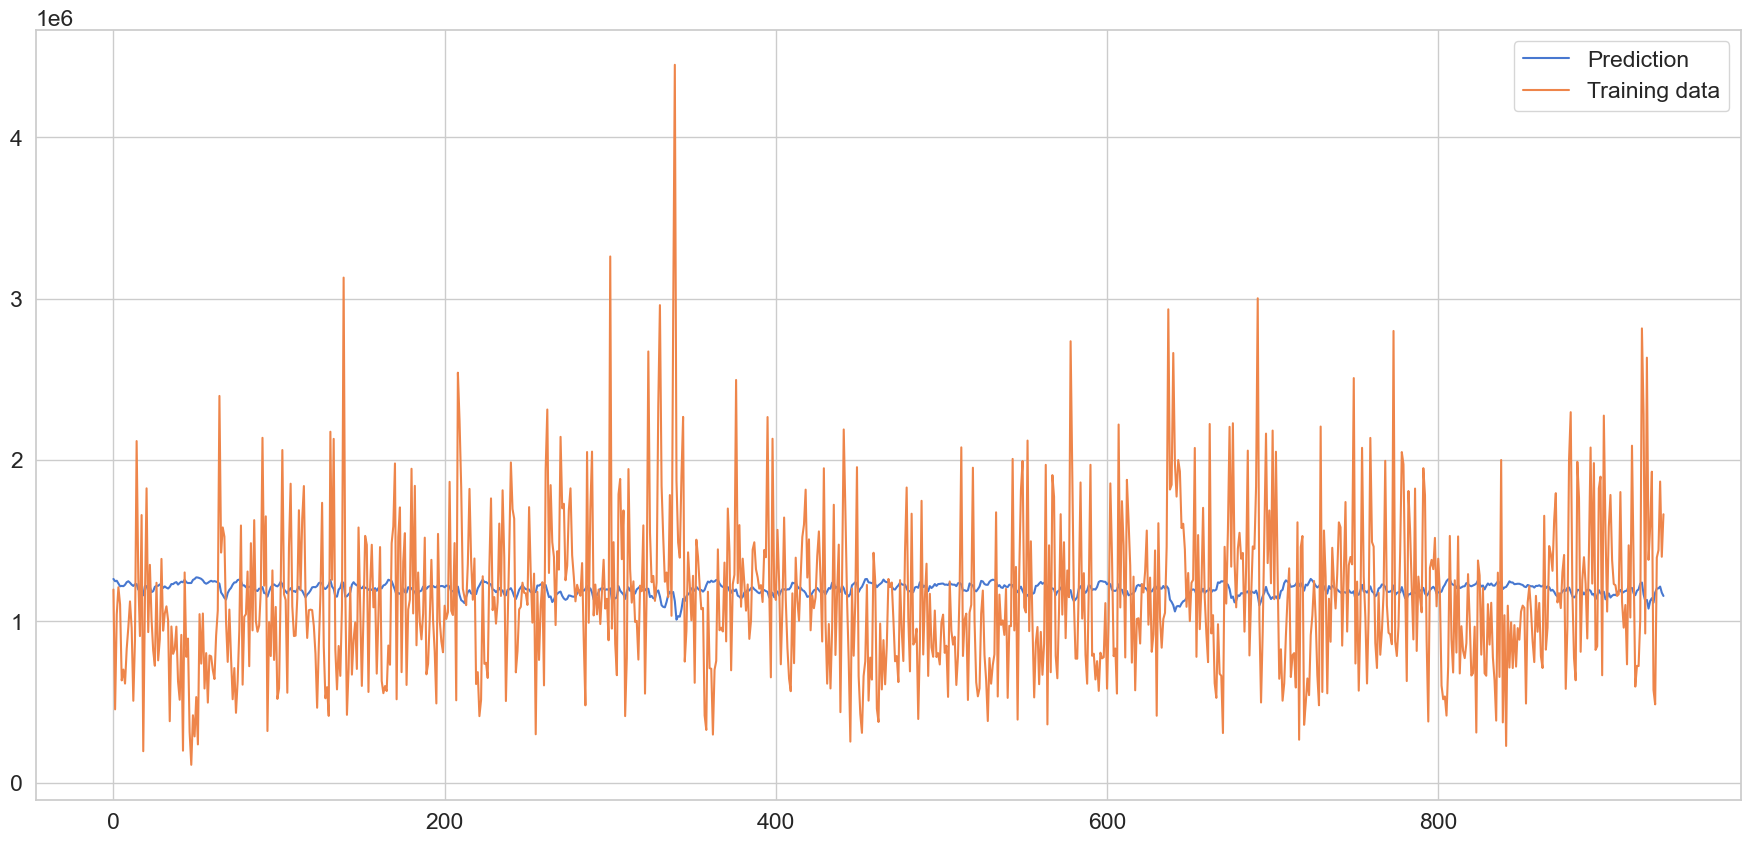

In [57]:
orig_predictions = scaler.inverse_transform(train_predictions)
eval_batch = scaler.inverse_transform(scaled_data[length:]);
plt.plot(orig_predictions, label='Prediction')
plt.plot(eval_batch, label='Training data')
plt.legend()
plt.show()

In [199]:
val_predictions = model.predict(X_val)
val_results = scaler.inverse_transform(val_predictions).flatten()
val_target = scaler.inverse_transform(y_val).flatten()
validation_results = pd.DataFrame(data={'Validation Predictions': val_results, 'Actuals':val_target})
validation_results

2/2 [==============================] - 0s 24ms/step


,Validation Predictions,Actuals
0,1.009397e+06,511428.0
1,9.493852e+05,603995.0
2,1.203453e+06,1138267.0
3,1.037126e+06,1283126.0
4,8.465874e+05,1096108.0
5,1.274596e+06,1845110.0
6,1.120185e+06,666725.0
7,1.182918e+06,1907505.0
8,1.038902e+06,848071.0
9,1.138463e+06,1134753.0


In [168]:
test_predictions = model.predict(X_test)
test_results = scaler.inverse_transform(test_predictions).flatten()
test_target = scaler.inverse_transform(y_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_results, 'Actuals': test_target})
test_results

5/5 [==============================] - 0s 14ms/step


,Test Predictions,Actuals
0,1251716.625,2508420.0
1,1360808.000,739580.0
2,1292723.750,1247214.0
3,1281720.875,571250.0
4,1187211.250,1032829.0
...,...,...
145,1268037.875,1981523.0
146,1347902.250,823758.0
147,1301500.375,846494.0
148,1238859.750,1824840.0
